<a href="https://colab.research.google.com/github/wildabrek/LSTM_Price/blob/main/PriceChangePrediction_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas_ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=387acea62fd179abc41705fdca0064a1eaa5b972eaf438899b78acdc926ab892
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
!pip install zigzag

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.3 MB/s eta 0:00:00
  Created wheel for zigzag: filename=zigzag-0.3.2-cp310-cp310-manylinux_2_35_x86_64.whl size=778670 sha256=00920fb8703a22f4f22c0ca01c523e6d4a98a3f2efb1ca621923069314d1edef
  Stored in directory: /root/.cache/pip/wheels/e2/27/4f/a2cca46b8db81b9fdbec9d8cdd22ad52ccfce1deb318c108c4
Successfully built zigzag
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.2
    Uninstalling Cython-3.0.2:
      Successfully uninstalled Cython-3.0.2


In [4]:
from zigzag import *

In [5]:
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

ticker= "googl"
stock_data = yf.download(ticker, start="2016-01-04", end="2021-05-12")

[*********************100%%**********************]  1 of 1 completed


In [6]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000


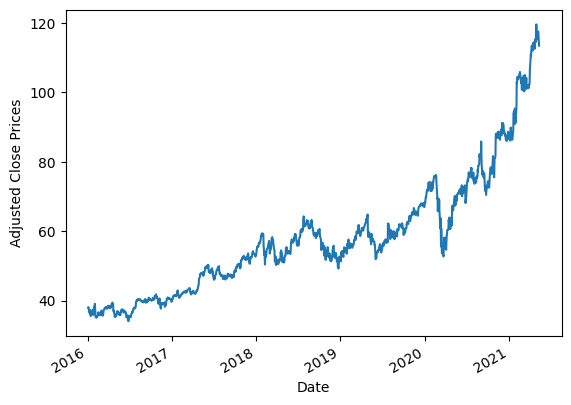

In [7]:
stock_data['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [51]:
stock_data['ret'] = stock_data['Adj Close'].pct_change()

In [8]:
Z = stock_data['Adj Close'].values
pivots = peak_valley_pivots(Z, 0.03, -0.03)


In [56]:
len(pivots)

1348

In [57]:
stock_data['pivots'] = pivots

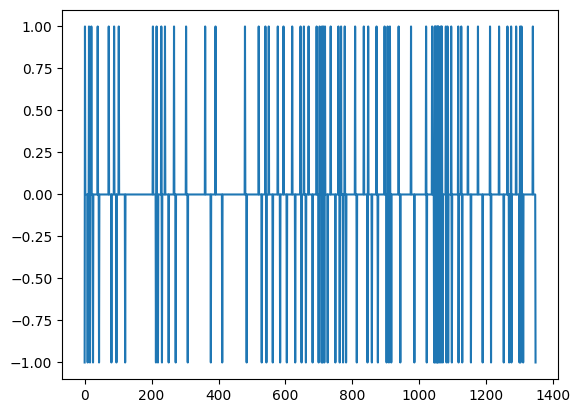

In [62]:
plt.plot(pivots)
plt.show()

In [58]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,ret,pivots
Date,,,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000,NaN,-1
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000,0.002752,1
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000,-0.002889,0
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000,-0.024140,0
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000,-0.013617,0
...,...,...,...,...,...,...,...,...
2021-05-05,116.431503,116.750000,115.414001,115.738503,115.738503,26636000,0.003442,0
2021-05-06,115.316498,116.867500,114.652000,116.867500,116.867500,25190000,0.009755,0
2021-05-07,118.194504,118.562500,117.307999,117.596497,117.596497,28898000,0.006238,0


In [10]:
zigzagdata = []
def plot_pivots(X, pivots):
    #print(X)
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    #plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    #for i in range(len(X)):
    zigzagdata = pd.DataFrame(X[pivots != 0], columns= ['zig'])
    print(zigzagdata.pct_change())
    return zigzagdata
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

          zig
0         NaN
1    0.002752
2   -0.067023
3    0.049219
4   -0.037400
..        ...
130 -0.042712
131  0.046346
132 -0.037705
133  0.183749
134 -0.051280

[135 rows x 1 columns]


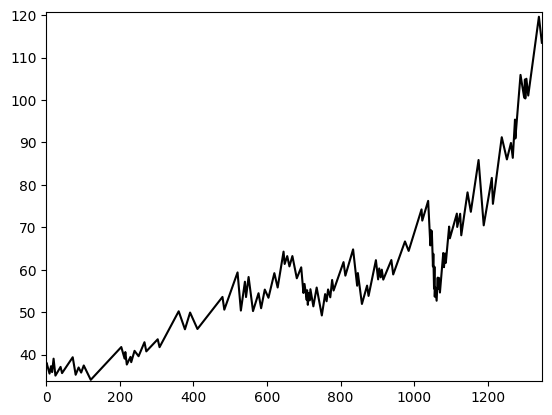

In [11]:
zigzagdata = plot_pivots(Z, pivots)


In [12]:
zigzagdata['return'] = zigzagdata['zig'].pct_change()
zigzagdata.dropna(inplace=True)
zigzagdata

,zig,return
1,38.076500,0.002752
2,35.524502,-0.067023
3,37.272999,0.049219
4,35.879002,-0.037400
5,39.045502,0.088255
...,...,...
130,100.375000,-0.042712
131,105.027000,0.046346
132,101.067001,-0.037705
133,119.638000,0.183749


In [89]:
from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(0,1))
scaler=MinMaxScaler()
df1sc=scaler.fit_transform(np.array(zigzagdata['return']).reshape(-1,1))

In [14]:
df1sc

array([[-0.10367945],
       [-0.44713245],
       [ 0.12504712],
       [-0.30131793],
       [ 0.31719146],
       [-0.62079541],
       [ 0.17171441],
       [-0.31201676],
       [ 0.39986403],
       [-0.63352709],
       [ 0.12237599],
       [-0.27746802],
       [ 0.11357497],
       [-0.56229339],
       [ 1.        ],
       [-0.43904133],
       [ 0.07737217],
       [-0.47343421],
       [ 0.11947231],
       [-0.27379109],
       [ 0.22770171],
       [-0.27033088],
       [ 0.29273268],
       [-0.36498904],
       [ 0.22771651],
       [-0.32729382],
       [ 0.8796819 ],
       [-0.53295576],
       [ 0.30489514],
       [-0.49905387],
       [ 0.69065807],
       [-0.3933677 ],
       [ 0.73742799],
       [-0.86268266],
       [ 0.54703595],
       [-0.42835019],
       [ 0.31702047],
       [-0.79587666],
       [ 0.29543877],
       [-0.43742684],
       [ 0.30813183],
       [-0.28861224],
       [ 0.41737071],
       [-0.3990355 ],
       [ 0.62895927],
       [-0

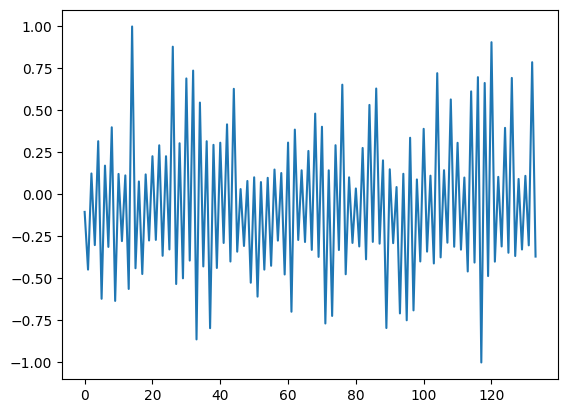

In [15]:
plt.plot(df1sc)
plt.show()

In [16]:
train_data = df1sc[0:100]
test_data = df1sc[100:]

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)


(95, 4)
(95,)
(29, 4)
(29,)


(None, None, None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 4, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2000,batch_size=1024,verbose=1)


Epoch 1/2000
1/1 [==============================] - 0s 98ms/step - loss: 0.0449 - val_loss: 0.0801
Epoch 2/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.0449 - val_loss: 0.0803
Epoch 3/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.0448 - val_loss: 0.0802
Epoch 4/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.0448 - val_loss: 0.0804
Epoch 5/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.0447 - val_loss: 0.0806
Epoch 6/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0447 - val_loss: 0.0808
Epoch 7/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0447 - val_loss: 0.0808
Epoch 8/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0446 - val_loss: 0.0809
Epoch 9/2000
1/1 [==============================] - 0s 54ms/step - loss: 0.0446 - val_loss: 0.0811
Epoch 10/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0446 - val_loss: 0.0812
Epoch 11/

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


1/1 [==============================] - 0s 28ms/step


In [44]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
import math

In [46]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


0.3576823788360199

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


0.44262891570592616

In [30]:
X_test

array([[[ 0.39077291],
        [-0.34011992],
        [ 0.11193995],
        [-0.41058536]],

       [[-0.34011992],
        [ 0.11193995],
        [-0.41058536],
        [ 0.72200211]],

       [[ 0.11193995],
        [-0.41058536],
        [ 0.72200211],
        [-0.37446282]],

       [[-0.41058536],
        [ 0.72200211],
        [-0.37446282],
        [ 0.14445   ]],

       [[ 0.72200211],
        [-0.37446282],
        [ 0.14445   ],
        [-0.28691893]],

       [[-0.37446282],
        [ 0.14445   ],
        [-0.28691893],
        [ 0.56565533]],

       [[ 0.14445   ],
        [-0.28691893],
        [ 0.56565533],
        [-0.31101893]],

       [[-0.28691893],
        [ 0.56565533],
        [-0.31101893],
        [ 0.30760217]],

       [[ 0.56565533],
        [-0.31101893],
        [ 0.30760217],
        [-0.32827249]],

       [[-0.31101893],
        [ 0.30760217],
        [-0.32827249],
        [ 0.10074692]],

       [[ 0.30760217],
        [-0.32827249],
        [ 0.10

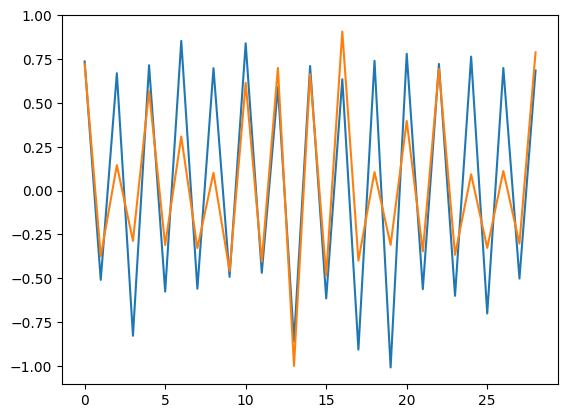

In [36]:
plt.plot(test_predict*9)
plt.plot(y_test)
#plt.plot(X_train[look_back:len(train_predict)+look_back])
plt.show()

In [70]:
stock_data['pivots'][0]

-1

In [73]:
j = 0
stock_data['point'] = 0
for i in range(len(stock_data)):
  if stock_data['pivots'][i] != 0:
    j = j + 1
    stock_data['point'][i] = j
  if stock_data['pivots'][i] == 0:
    stock_data['point'][i] = 0

len(stock_data['ret'])

<ipython-input-73-51735e0bceab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['point'][i] = j
<ipython-input-73-51735e0bceab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['point'][i] = 0


1348

In [79]:
stock_data['point']

Date
2016-01-04      1
2016-01-05      2
2016-01-06      0
2016-01-07      0
2016-01-08      0
             ... 
2021-05-05      0
2021-05-06      0
2021-05-07      0
2021-05-10      0
2021-05-11    135
Name: point, Length: 1348, dtype: int64

In [84]:
tesst = ["dene"]
print(tesst)
if tesst ==[]:
  print("yes")

['dene']


In [87]:
tesst.append('haydi')

In [88]:
tesst

['dene', 'haydi', 'haydi']

In [ ]:
def vectortodata(dataname,vectorname):
  for j in range(len(vectorname)):
    dataname['scaled'][j] = vectorname[j]


In [124]:
stock_data.dropna(inplace=True)

In [173]:
# Example lists
random_numbers = stock_data['ret']
binary_values = stock_data['point']

# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Find indices of 1s in the binary_values list
one_indices = [i for i, val in enumerate(binary_values) if val != 0]

# Initialize lists to store the scaled values
scaled_arrays = []

# Loop through the 1s in the binary_values list
for i in range(len(one_indices) - 1):
    start_index = one_indices[i]
    end_index = one_indices[i + 1]

    # Extract the sublist between 1s
    sub_list = random_numbers[start_index:end_index]

    # Reshape the sublist as a 2D array for scaling
    sub_list = np.array(sub_list).reshape(-1, 1)

    # Scale the sublist
    scaled_sublist = scaler.fit_transform(sub_list)

    # Append the scaled sublist to the result
    scaled_arrays.extend(scaled_sublist)

print(scaled_arrays)

# Add the last scaled sublist from the last 1 to the end of the list
scaled_arrays.extend(scaler.fit_transform(np.array(random_numbers[one_indices[-1]:]).reshape(-1, 1)))

# Convert the result to a flat list
scaled_result = [val for sublist in scaled_arrays for val in sublist]

print(scaled_result)


[array([0.72743966]), array([0.61750635]), array([0.20336278]), array([0.40843999]), array([0.73139852]), array([1.]), array([0.]), array([0.99393273]), array([0.]), array([1.]), array([0.68491427]), array([0.98023559]), array([1.]), array([0.]), array([0.38606426]), array([0.]), array([1.]), array([0.60908299]), array([0.53101428]), array([1.]), array([0.]), array([0.27188694]), array([0.08202924]), array([0.76486271]), array([0.3850565]), array([0.70667565]), array([0.47986521]), array([0.51620439]), array([0.88015046]), array([1.]), array([0.]), array([0.6587084]), array([0.73925799]), array([0.09123861]), array([0.62401286]), array([0.78436455]), array([0.35022947]), array([0.23197911]), array([1.]), array([0.15498466]), array([0.]), array([0.19352735]), array([0.]), array([0.60386066]), array([0.98310776]), array([0.80518324]), array([1.]), array([0.75398233]), array([0.58967959]), array([0.79857104]), array([0.61489694]), array([0.48076667]), array([0.79587978]), array([0.5118099

In [175]:
print(scaler.inverse_transform([scaled_result]))

[[ 0.71797525  0.60804194  0.19389837 ...  0.78853348 -0.00946441
  -0.00946441]]


In [177]:
stock_data['ret']

Date
2016-01-05    0.002752
2016-01-06   -0.002889
2016-01-07   -0.024140
2016-01-08   -0.013617
2016-01-11    0.002955
                ...   
2021-05-05    0.003442
2021-05-06    0.009755
2021-05-07    0.006238
2021-05-10   -0.025587
2021-05-11   -0.009464
Name: ret, Length: 1347, dtype: float64

1347


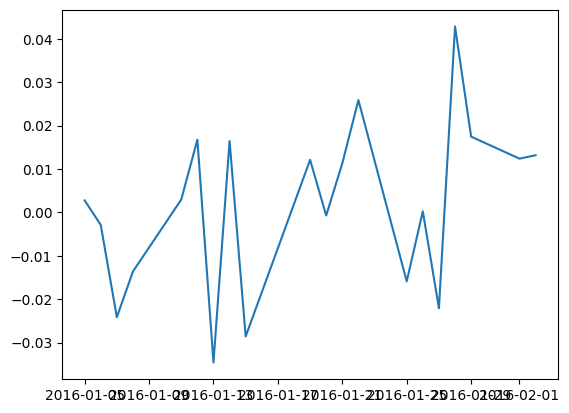

In [212]:
ceyk = scaler.inverse_transform([scaled_result])
print(len(ceyk[0]))
plt.plot(stock_data['ret'][:20])
#plt.plot(np.array(ceyk[0][:20]))
plt.show()

In [168]:
scvector = []
print("test")

stock_data['scaled'] = 0
for i in range(len(stock_data)):
  if stock_data['point'][i] != 0:
    if np.array(scvector).size > 0:
      print("s dolu")

      #print("scvector")
      #print()
      [scvector].append(stock_data['ret'][i])
      scvector = scaler.fit_transform(np.array([scvector]))
      print(scvector.shape)
      for nane in range(len([scvector])):
        stock_data['scaled'][nane] = scvector[0][nane]
    if stock_data['point'][i] == 0:
      [scvector].append(stock_data['ret'][i])
  if np.array(scvector).size == 0:
    print("scvector boş")
    if stock_data['point'][i] != 0 :
      scvector.append(stock_data['ret'][i])



test
scvector boş
s dolu
s dolu
s dolu
s dolu
s dolu
s dolu
s dolu
s dolu
scvector
(1, 1)
s dolu
s dolu
s dolu
s dolu
scvector


<ipython-input-168-d3b1cd2af8e8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['scaled'][nane] = scvector[0][nane]


ValueError: ignored

In [169]:
scvector

array([[0.]])

In [170]:
stock_data['scaled']

Date
2016-01-05    0
2016-01-06    0
2016-01-07    0
2016-01-08    0
2016-01-11    0
             ..
2021-05-05    0
2021-05-06    0
2021-05-07    0
2021-05-10    0
2021-05-11    0
Name: scaled, Length: 1347, dtype: int64

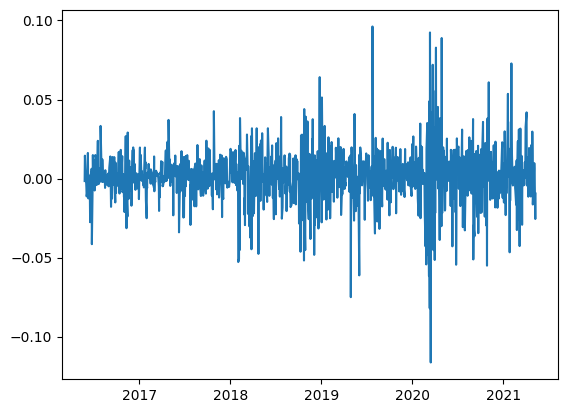

In [53]:
plt.plot(stock_data['ret'][100:])
plt.show()

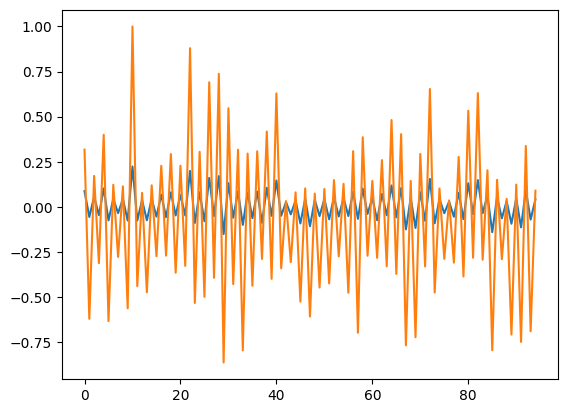

In [50]:
plt.plot(train_predict)
plt.plot(y_train)
#plt.plot(X_train[look_back:len(train_predict)+look_back])
plt.show()

In [34]:
test_predict

array([[ 0.08172383],
       [-0.05658581],
       [ 0.07425417],
       [-0.09199668],
       [ 0.07930962],
       [-0.06399138],
       [ 0.09475534],
       [-0.06219878],
       [ 0.07747579],
       [-0.05469283],
       [ 0.09320543],
       [-0.05213884],
       [ 0.06552932],
       [-0.09555493],
       [ 0.07884706],
       [-0.06833474],
       [ 0.07044493],
       [-0.10073344],
       [ 0.08215434],
       [-0.11207234],
       [ 0.08661025],
       [-0.06249051],
       [ 0.08017142],
       [-0.06671201],
       [ 0.08477885],
       [-0.07789587],
       [ 0.0775778 ],
       [-0.05575662],
       [ 0.075981  ]], dtype=float32)

In [35]:
y_test

array([ 0.72200211, -0.37446282,  0.14445   , -0.28691893,  0.56565533,
       -0.31101893,  0.30760217, -0.32827249,  0.10074692, -0.45829439,
        0.61363731, -0.40519981,  0.69827917, -1.        ,  0.66366311,
       -0.48551338,  0.90636292, -0.3997565 ,  0.10485027, -0.30945471,
        0.39656674, -0.34686158,  0.6937489 , -0.36631199,  0.09240021,
       -0.32746677,  0.11090408, -0.30281888,  0.78724336])

In [11]:
len(stock_data)

1348

In [12]:
len(pivots)

1348

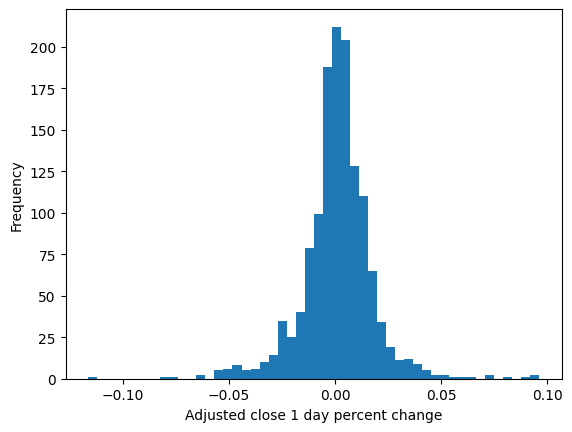

In [ ]:
stock_data['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

In [ ]:
feature_names = []
for n in [14, 30, 50, 200]:
    stock_data['ma' + str(n)] = ta.sma(stock_data['Adj Close'], length=n)
    stock_data['rsi' + str(n)] = ta.rsi(stock_data['Adj Close'], length=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [ ]:
stock_data['Volume_1d_change'] = stock_data['Volume'].pct_change()
stock_data['pct30'] = stock_data['Adj Close'].pct_change().shift(3)
stock_data['pct50'] = stock_data['Adj Close'].pct_change().shift(2)
stock_data['pct200'] = stock_data['Adj Close'].pct_change().shift(1)
stock_data['pct'] = stock_data['Adj Close'].pct_change()


volume_features = ['Volume_1d_change', 'pct30', 'pct50', 'pct200', 'pct']
feature_names.extend(volume_features)

In [ ]:
stock_data['5d_future_close'] = stock_data['Adj Close'].shift(-15)
stock_data['5d_close_past_pct'] = stock_data['5d_future_close'].pct_change(15) * 3
stock_data['5d_close_future_pct'] = stock_data['Adj Close'].pct_change(-1)

In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,ma14,rsi14,ma30,rsi30,...,rsi50,ma200,rsi200,Volume_1d_change,pct30,pct50,pct200,pct,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.689499,-0.002744
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.328960,NaN,NaN,NaN,0.002752,35.879002,0.002897
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.066127,NaN,NaN,0.002752,-0.002889,37.415001,0.024737
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.309630,NaN,0.002752,-0.002889,-0.024140,38.067501,0.013805
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.247513,0.002752,-0.002889,-0.024140,-0.013617,38.538502,-0.002946


In [ ]:
stock_data.dropna(inplace=True)

X = stock_data[feature_names]
y = stock_data['5d_close_future_pct']

train_size = int(0.85 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [ ]:
X_train

,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Volume_1d_change,pct30,pct50,pct200,pct
Date,,,,,,,,,,,,,
2016-10-18,40.312178,62.410517,40.197450,59.427718,40.11020,57.787771,37.717998,53.864671,1.167077,-0.009473,0.000647,0.002784,0.018157
2016-10-19,40.398607,65.148057,40.228866,60.837072,40.12956,58.647926,37.734325,54.176039,-0.344734,0.000647,0.002784,0.018157,0.006513
2016-10-20,40.461357,60.525314,40.260183,58.780100,40.14270,57.483953,37.749900,53.820531,-0.070795,0.002784,0.018157,0.006513,-0.006301
2016-10-21,40.545928,61.883808,40.319483,59.441749,40.15856,57.881785,37.770665,53.962143,0.159194,0.018157,0.006513,-0.006301,0.002957
2016-10-24,40.663607,67.647203,40.381016,62.439646,40.18725,59.729969,37.796873,54.634188,-0.104097,0.006513,-0.006301,0.002957,0.014174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,75.385750,50.235550,75.145833,53.408552,73.76738,53.734506,68.266205,52.911862,-0.258749,0.003930,0.017484,-0.004372,-0.001034
2020-08-11,75.084643,46.800234,75.284783,51.881832,73.81305,52.872226,68.321562,52.672470,0.513579,0.017484,-0.004372,-0.001034,-0.010876
2020-08-12,75.050679,52.533268,75.433434,54.107540,73.87798,54.104740,68.382297,53.022799,-0.276095,-0.004372,-0.001034,-0.010876,0.018034


In [ ]:
grid = {'n_estimators': [2000], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g)
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

-0.06131188455988634 {'random_state': 42, 'n_estimators': 2000, 'max_features': 8, 'max_depth': 3}


In [ ]:
y_test = y_test / 3

In [ ]:
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=36, max_features=48, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=36, max_features=48, n_estimators=2000,
                      random_state=42)

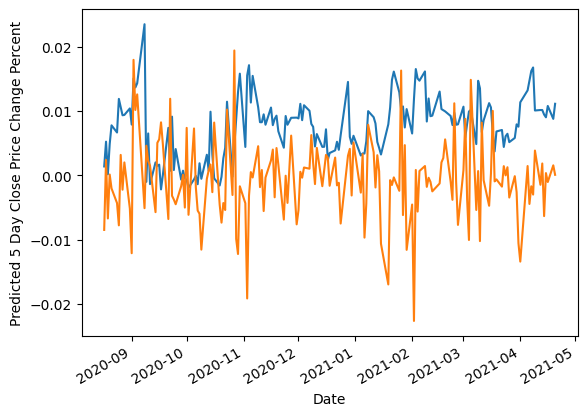

In [ ]:

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
y_test_ser = pd.Series(y_test, index=y_test.index)
y_test_ser.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [ ]:
y_test / y_pred

Date
2020-08-21    4.149880
2020-08-24   -3.181790
2020-08-25   -3.116865
2020-08-26    0.773530
2020-08-27   -1.026108
                ...   
2021-03-02    2.003504
2021-03-03   -0.860291
2021-03-04   -2.132152
2021-03-05    3.062183
2021-03-08   -1.344445
Name: 5d_close_future_pct, Length: 136, dtype: float64

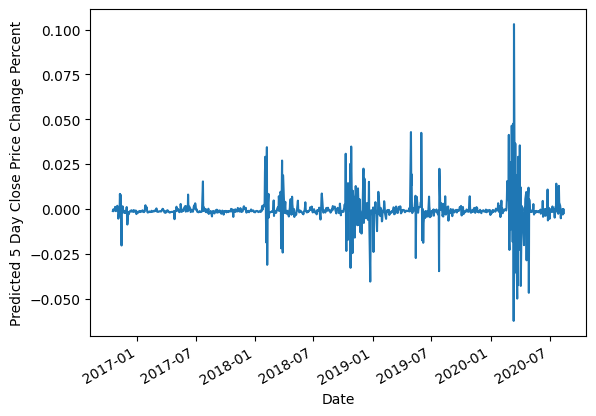

In [ ]:

y_pred = rf_model.predict(X_train)

y_pred_series = pd.Series(y_pred, index=y_train.index)
y_pred_series.plot()
y_test_ser = pd.Series(y_train, index=y_train.index)
#y_test_ser.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06748166195412872
Mean Squared Error: 0.00739742524428068
Root Mean Squared Error: 0.08600828590479338


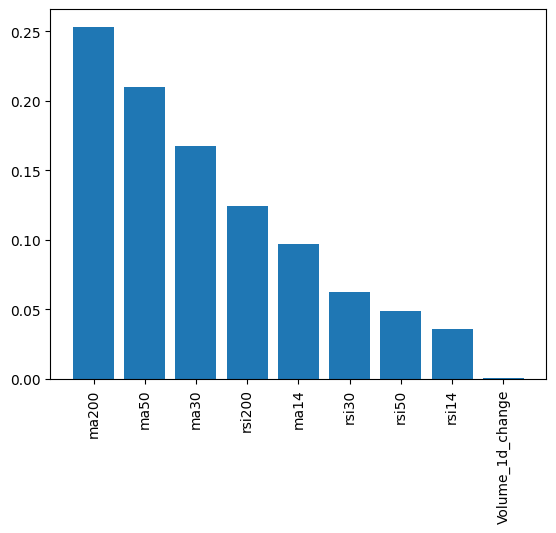

In [ ]:
importances = rf_model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x_values = range(len(importances))
labels = np.array(feature_names)[sorted_index]
plt.bar(x_values, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()